## Libraries

In [25]:
# standard Python libraries
import re
import requests
import datetime as dt
from IPython.display import clear_output
# common Python libraries
import pandas as pd
#import hvplot.pandas 
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
# nlp libraries
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# custom libraries
from reddit_api import Reddit_API

## Connect to Reddit

In [2]:
reddit = Reddit_API()
reddit.connect_reddit(pickle_name = './')

<Response [200]>


In [5]:
search_terms = ["alcohol","drinks","cocktails","beer","wine","liquor","spirits",
    "happyhour","mixology","bartender","craftbeer","winelover","drinkstagram",
    "whiskey","vodka","gin","rum","tequila","drinking","drinkresponsibly"]
results_df = pd.DataFrame()
for search_term in search_terms:
    print(f'searching {search_term}...')
    df = reddit.post_search(search_term, limit = 1000)
    df['search_term'] = search_term
    results_df = pd.concat([results_df, df])
    results_df = results_df[~results_df.duplicated()].reset_index(drop = True)
print(results_df.shape)
results_df.head()

searching alcohol...
searching drinks...
searching cocktails...
searching beer...
searching wine...
searching liquor...
searching spirits...
searching happyhour...
searching mixology...
searching bartender...
searching craftbeer...
searching winelover...
searching drinkstagram...
searching whiskey...
searching vodka...
searching gin...
searching rum...
searching tequila...
searching drinking...
searching drinkresponsibly...
(4192, 15)


,created,created_utc,subreddit,subreddit_id,selftext,author_fullname,title,name,id,author,num_comments,url,upvote_ratio,ups,search_term
0,1.673412e+09,1.673412e+09,Damnthatsinteresting,t5_2xxyj,,t2_f8zi494m,"Contrary to popular belief,no amount of alcoho...",t3_108vj2n,108vj2n,UniqueCold3812,5428,https://i.imgur.com/wdFGeBl.jpg,0.80,49087,alcohol
1,1.677711e+09,1.677711e+09,unpopularopinion,t5_2tk0s,"I was never a problematic drinker, but did alw...",t2_a3ih64q1,Life is better in every way when you ditch alc...,t3_11fknkh,11fknkh,Pure_Club_8997,544,https://www.reddit.com/r/unpopularopinion/comm...,0.89,2202,alcohol
2,1.677793e+09,1.677793e+09,loseit,t5_2rz8w,I'm not saying you can't lose weight while dri...,t2_1uc2ctml,"If you're serious about this, take a break fro...",t3_11geo7u,11geo7u,noodlesworldwide,284,https://www.reddit.com/r/loseit/comments/11geo...,0.96,2505,alcohol
3,1.675208e+09,1.675208e+09,AskReddit,t5_2qh1i,,t2_2wguso99,"Redditors, why don't you drink alcohol or why ...",t3_10qdyyd,10qdyyd,LuGGooo,2525,https://www.reddit.com/r/AskReddit/comments/10...,0.84,792,alcohol
4,1.680893e+09,1.680893e+09,therewasanattempt,t5_39ne7,,t2_rabj2wla,to stay on the plane after an altercation with...,t3_12euyic,12euyic,timberdroid,5661,https://v.redd.it/89qwnyl0aisa1,0.91,40691,alcohol


In [7]:
results_df.to_csv(f"./data/alcohol_reddit_{dt.datetime.now().strftime('%m%d%Y')}")

In [26]:
results_df = pd.read_csv('./data/alcohol_reddit_04202023', index_col = 0)

## Data Enrichment

In [14]:
def bulleted_string_to_list(string):
    # Split the string by lines
    lines = string.strip().split('\n')
    
    # Compile the regular expression pattern for bullet points
    bullet_pattern = re.compile(r'^\s*(\d+[\.\)])\s+')

    # Iterate through the lines and extract the text after the bullet points
    result = [bullet_pattern.sub('', line) for line in lines if bullet_pattern.match(line)]
    
    return result


In [3]:
from content_evaluator import Content_Evaluator
import numpy as np
evaluator = Content_Evaluator()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\stvnc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


API key loaded from api_key.pkl


### VADER Sentiment and Named Entity

In [6]:
content = 'Hey San Francisco - how do you "Spritz"? Do it the @lillet way. Cheers 🥂#drinkresponsibly #lillet #thelilletway #dessertwine #SF #sanfrancisco #outdoor#ooh #advertising #wallscapes #marketing \n\nhttps://preview.redd.it/lu81ozglb3e31.jpg?width=3061&amp;format=pjpg&amp;auto=webp&amp;v=enabled&amp;s=6e83c5670262eb164940d38ab6a5f188aa38ea92'
print(f'''
sentiment: {evaluator.vader_sentiment(content)}
named_entity: {evaluator.named_entity(content)}
''')


sentiment: 0.5362
named_entity: ['San Francisco', 'Spritz', '#drinkresponsibly #', '#thelilletway', '#SF #', '#outdoor#ooh', '#advertising #']



### Relevance

In [7]:
content = 'Hey San Francisco - how do you "Spritz"? Do it the @lillet way. Cheers 🥂#drinkresponsibly #lillet #thelilletway #dessertwine #SF #sanfrancisco #outdoor#ooh #advertising #wallscapes #marketing \n\nhttps://preview.redd.it/lu81ozglb3e31.jpg?width=3061&amp;format=pjpg&amp;auto=webp&amp;v=enabled&amp;s=6e83c5670262eb164940d38ab6a5f188aa38ea92'
prompt = evaluator.relevance_prompt(content)
response = evaluator.evaluate_prompt(prompt)
response

'Yes'

In [27]:
prompt

'Is this post related to alcoholic beverages? (respond with "yes" or "no" only):\'title: Playoff mode activated: I\'m giving up alcohol and fapping until the Laker\'s postseason is over., content:I\'M LOCKED IN with the Lakers. Gonna give up drinking and fapping until the Lakers either win it all or get eliminated. IT\'S PLAYOFF TIME. \n\nLET\'S GO.\''

In [7]:
content = '''Playoff mode activated: I'm giving up alcohol and fapping until the Laker's postseason is over.'''
prompt = f'''"{content}" is this related to alcoholic beverages? '''
prompt = evaluator.relevance_prompt(content)
response = evaluator.evaluate_prompt(prompt, model ="text-davinci-003" )
response

'N'

In [9]:
response = evaluator.evaluate_prompt(prompt, model ="text-davinci-003" )
response

'N'

In [10]:
prompt

'"Playoff mode activated: I\'m giving up alcohol and fapping until the Laker\'s postseason is over." Is that quote related to alcoholic beverages? Return (Y/N)?'

In [17]:
evaluator = Content_Evaluator()
content = ''''Playoff mode activated: I'm giving up alcohol and fapping until the Laker's postseason is over.'''
response = evaluator.evaluate_questions(content)
response

API key loaded from api_key.pkl


{'category': 'Not related to alcoholic beverages',
 'summary': 'No alcohol or sex.'}

In [28]:
from content_evaluator import Content_Evaluator
import numpy as np
evaluator = Content_Evaluator()

df_sample = results_df.sample(n=1000).reset_index(drop = True)
df = df_sample.copy()

for i, row in df.iterrows():
    if (i == 0) | (i%10==0):
        clear_output(wait=True)
        print(f'''
        starting iteration: {i}
        ''')
    # collect title and selftext
    selftext = row['selftext']
    title = row['title']
    if type(selftext) == str:
        content = f"title: {title}, content:{selftext}"
    else:
        content = title
    # cutdown the number of tokens
    content = content[0:1000]
    # VADER sentiment
    df.loc[i, 'VADER sentiment'] = evaluator.vader_sentiment(content)
    # Named Entities
    df.loc[i,'Named Entities'] = str(evaluator.named_entity(content))
    # Relevance 
    prompt = evaluator.relevance_prompt(content)
    response = evaluator.evaluate_prompt(prompt,model ="text-davinci-003")
    df.loc[i, 'Relevant'] = response
    if response[0].upper() == 'Y':
        response = evaluator.evaluate_questions(content)
        df.loc[i, 'category'] = response['category']
        df.loc[i, 'summary'] = response['summary']
    
#     response = evaluator.evaluate_questions(content = content )
#     for col, answer in response.items():
#         results_df.loc[i, col] = answer

    
    


        starting iteration: 990
        


In [54]:
df.to_clipboard()

In [29]:
df.to_csv('./data/enriched_data.csv')

In [33]:
cols = ['subreddit', 'selftext', 'title','ups','num_comments','VADER sentiment', 'Named Entities','Relevant',
        'category','summary']
df[cols].sort_values(by = 'ups')

,subreddit,selftext,title,ups,num_comments,VADER sentiment,Named Entities,Relevant,category,summary
674,ottawa,"Hey all,\n\nI'm a big fan of drinking / mixing...",Best mixology classes for beginners,0,12,0.9417,['a fun evening'],Y,Cocktail recipes and tutorials,Cocktail mixing class.
512,Design,NaN,I’ve been thinking of creating a clothing bran...,0,1,0.2960,['HAPPYHOUR'],N,NaN,NaN
834,Mixology,"Hey,\n\nI'm sorry. I'm hope I'm right here. \*...","Present Idea for ""Hobby - Mixologe""?",0,3,0.9535,"['Ideas', 'this year']",Y,Cocktail recipes and tutorials,bar equipment
524,Kentucky,NaN,It’s almost time for NYE Live!,0,0,0.0000,['NYE'],N,NaN,NaN
39,AskReddit,I've been with this company for less than a ye...,How to overcome shyness in work parties/happyh...,0,10,0.4525,"['less than a year', 'hour', 'yesterday', 'one...",N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19,facepalm,NaN,20 year Mississippi news anchor Barbie Basset ...,57386,7175,-0.5574,"['20 year', 'Mississippi', 'Barbie', 'Fo Shizz...",N,NaN,NaN
124,WinStupidPrizes,NaN,Blowing a fire with vodka,60512,1486,-0.3400,None,Y,Not related to alcoholic beverages,"fire, vodka, blowing"
599,WhitePeopleTwitter,NaN,Drinking from straws.,72588,15614,0.0000,None,N,NaN,NaN
734,MurderedByWords,NaN,Carding for drinks is literally racism,73123,2146,-0.6249,None,N,NaN,NaN


<AxesSubplot:>

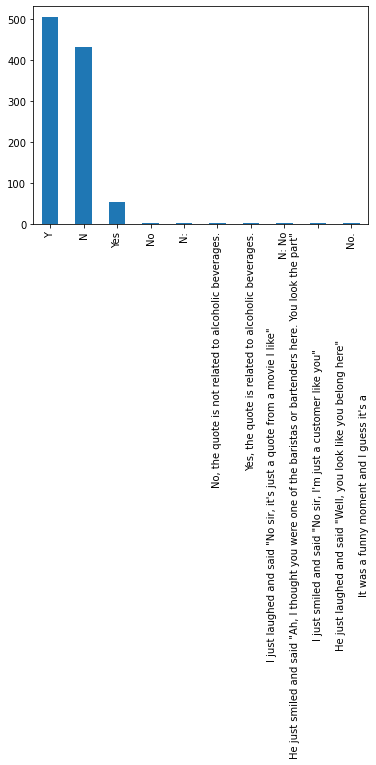

In [31]:
df.Relevant.value_counts().plot(kind = 'bar')

In [61]:
categories = ['Cocktail recipes and tutorials','Wine and beer recommendations','Party and event photos',
                      'Alcohol-related memes and humor','Reviews of bars and restaurants','Alcohol-related news and trends',
                      'Personal stories and experiences','Celebrity endorsements and sponsorships',
                    'Health and wellness tips','Advocacy and activism', 'Not related to Alcohol Beverages']
df[(~df.category.isin(categories)) & (~df.category.isna())]

,created,created_utc,subreddit,subreddit_id,selftext,author_fullname,title,name,id,author,num_comments,url,upvote_ratio,ups,search_term,VADER sentiment,Named Entities,Relevant,category,summary
7,1.679683e+09,1.679683e+09,drunk,t5_2ql00,NaN,t2_6xgtybj9,"Starting a bit early today, bought 14 beers an...",t3_120tc67,120tc67,Educational_Ad_3063,11,https://i.redd.it/suj88cysurpa1.jpg,0.99,93,vodka,0.0000,"['early today', '14', 'Friday']",Y,Not related to alcoholic beverages,"alcohol, party, Friday"
9,1.680994e+09,1.680994e+09,Military,t5_2qh8y,NaN,t2_72j6tgvr,After field shower beer...,t3_12g100s,12g100s,chair-borne1,42,https://i.redd.it/vwojlr9h6ssa1.jpg,0.98,2878,beer,0.0000,None,Y,Not related to alcoholic beverages,After field shower beer.
14,1.681917e+09,1.681917e+09,anchorage,t5_2qwcp,NaN,t2_bjk39xo,Whiskey &amp; Ramen in Imbibe Magazine,t3_12rwg88,12rwg88,sailrgrl,17,https://imbibemagazine.com/inside-look-whisky-...,0.77,17,whiskey,0.0000,"['Whiskey &', 'Ramen', 'Imbibe Magazine']",Y,"""Reviews of bars and restaurants""",Whiskey and ramen.
21,1.677388e+09,1.677388e+09,LivestreamFail,t5_38jf0,NaN,t2_bbop2xgi,JustaMinx drops her bottle of whiskey after dr...,t3_11c62zb,11c62zb,ElectricalGoose4029,299,https://clips.twitch.tv/LachrymoseObliviousSan...,0.75,543,whiskey,0.0000,None,Y,"""Alcohol-related memes and humor""",Drunkenness and clumsiness.
37,1.681132e+09,1.681132e+09,conspiracy,t5_2qh4r,I used to drink average socially acceptable am...,t2_dz8todsa,Alcohol is the most widely accepted use of min...,t3_12hiaqw,12hiaqw,ipetgoat1984,474,https://www.reddit.com/r/conspiracy/comments/1...,0.89,1080,alcohol,0.7251,"['five years', '1000%']",Y,Not related to alcoholic beverages,Alcohol control and productivity.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1.679839e+09,1.679839e+09,notlikeothergirls,t5_34pb7,NaN,t2_hjn71f4v,Not like other girls because she drinks whiske...,t3_122mv34,122mv34,rinaroo24,96,https://i.redd.it/6ybj9wg4s4qa1.jpg,0.99,826,drinks,-0.2755,None,Y,Not related to alcoholic beverages,"Different, drinks whiskey."
977,1.679362e+09,1.679362e+09,whiskey,t5_2r06y,I won a lottery paid $95 with tax for this non...,t2_vkb7q8dn,The only benefit of state control liquor,t3_11x2r8e,11x2r8e,run4whiskey,31,https://i.redd.it/f8p6x578d1pa1.jpg,0.96,128,liquor,0.7717,['95'],Y,"""Alcohol-related news and trends""",The content is about a person who won a lotter...
982,1.675781e+09,1.675781e+09,Damnthatsinteresting,t5_2xxyj,NaN,t2_5ksnwvwg,How Tequila is made from Agave.,t3_10w3i4p,10w3i4p,Ocelot859,41,https://v.redd.it/n6giewyg3sga1,0.98,1012,tequila,0.0000,"['Tequila', 'Agave']",Y,"""Tequila is made from Agave.""",Tequila is made from agave.
989,1.677306e+09,1.677306e+09,u_Less-Morning-8163,t5_37tt7k,NaN,t2_8dc2k1w1,Wieninger Bock Biere - https://kraftbier0711.d...,t3_11bdwhj,11bdwhj,Less-Morning-8163,0,https://kraftbier0711.de/wieninger-bock-biere/...,1.00,2,craftbeer,0.0000,['Wieninger Bock Biere - https://kraftbier0711...,Y,Beer recommendations,Bock beer from Wieninger.


In [40]:
df[df.category == "Personal stories and experiences"].sort_values(by = 'ups',ascending = False)

,created,created_utc,subreddit,subreddit_id,selftext,author_fullname,title,name,id,author,num_comments,url,upvote_ratio,ups,search_term,VADER sentiment,Named Entities,Relevant,category,summary
169,1.673208e+09,1.673208e+09,CasualUK,t5_3j2jr,NaN,t2_hnz21y96,Is drinking 2 bottles of wine an unacceptable ...,t3_106sjnd,106sjnd,Necessary-Trash-8828,1574,https://www.reddit.com/r/CasualUK/comments/106...,0.92,4774,wine,-0.4588,"['2', 'Sunday', '1300', 'second', '2000']",Y,Personal stories and experiences,Too much wine.
843,1.679049e+09,1.679049e+09,teenagers,t5_2rjli,as hard as you can and started healthy habits....,t2_tqe273a,I’m 31 and weirdly I get recommended this sub ...,t3_11tn50q,11tn50q,Kaje26,476,https://www.reddit.com/r/teenagers/comments/11...,0.91,4761,drinking,0.9796,None,Yes,Personal stories and experiences,Don't do drugs
595,1.679237e+09,1.679237e+09,traaaaaaannnnnnnnnns,t5_2uog0,NaN,t2_z5lzp,So the bartender winked at me and gave me a fr...,t3_11vn1mu,11vn1mu,WickedDarkStorm,27,https://i.redd.it/m0h5rdzxipoa1.jpg,1.00,2252,bartender,0.5106,None,Y,Personal stories and experiences,Free drink.
924,1.680092e+09,1.680092e+09,selfie,t5_2w2f5,NaN,t2_6cgarsfgw,4 months sober from alcohol today! Every day j...,t3_125mcj6,125mcj6,winter-iscumming,236,https://i.redd.it/ky8fa8aaopqa1.png,0.99,2205,alcohol,0.4926,"['4 months', 'today', 'Every day', '28f']",Y,Personal stories and experiences,"Sober, happy, proud."
933,1.677711e+09,1.677711e+09,unpopularopinion,t5_2tk0s,"I was never a problematic drinker, but did alw...",t2_a3ih64q1,Life is better in every way when you ditch alc...,t3_11fknkh,11fknkh,Pure_Club_8997,544,https://www.reddit.com/r/unpopularopinion/comm...,0.89,2202,alcohol,0.9846,"['1', '2', '3', '4', '5', '6', '7', '8', '9', ...",Y,Personal stories and experiences,"No hangovers, saves money, better skin."
913,1.679998e+09,1.679998e+09,stopdrinking,t5_2s7yr,I LOVE what I do. I hate drinking everyday. I’...,t2_gf5iwtn0,I’m a bartender that has been drinking on the ...,t3_124jszm,124jszm,blindbatcat,92,https://www.reddit.com/r/stopdrinking/comments...,1.00,1384,bartender,0.9678,"['second', 'two', 'these two days']",Y,Personal stories and experiences,Sobriety in bartending.
590,1.681807e+09,1.681807e+09,Nails,t5_2qhwc,Hating myself right now,t2_tzl31gi7,Did my nails after 3 wines. Woke up to this.,t3_12qgccs,12qgccs,bluecottonpants,70,https://i.redd.it/il5gnb7ucnua1.jpg,0.98,902,wine,0.0000,['3'],Y,Personal stories and experiences,"Nails, wine, regret."
175,1.680782e+09,1.680782e+09,stopdrinking,t5_2s7yr,"Been about 6 months for me now, and I think so...",t2_gjwl8,What's your favorite thing about not drinking?,t3_12dhps6,12dhps6,username0304,559,https://www.reddit.com/r/stopdrinking/comments...,0.99,881,drinking,-0.1260,['about 6 months'],Y,Personal stories and experiences,Not drinking alcohol.
22,1.680991e+09,1.680991e+09,unpopularopinion,t5_2tk0s,When you drink at home during the day with you...,t2_cy4poaz6,Day drinking at home with friends better than ...,t3_12fzjse,12fzjse,InternalOperation729,130,https://www.reddit.com/r/unpopularopinion/comm...,0.91,746,drinking,0.8750,"['night', 'the day', '11pm', 'the next day', '...",Y,Personal stories and experiences,Comfortable day drinking.
238,1.681384e+09,1.681384e+09,onmww,t5_ekh3m,NaN,t2_kheq9gl5,• she lived for nights thick with lust and rom...,t3_12kl74t,12kl74t,BlondeVixxen,87,https://i.redd.it/wi0a09jaeota1.jpg,0.99,677,wine,0.7845,['nights'],Y,Personal stories and experiences,"passionate, romantic, sensual"


<AxesSubplot:>

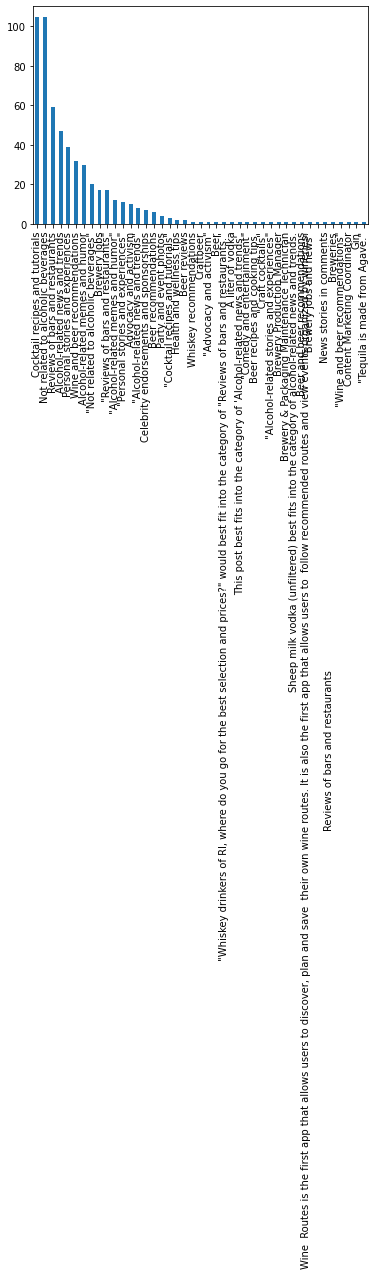

In [34]:
df.category.value_counts().plot(kind = 'bar')

In [48]:
cols = ['subreddit','selftext','title','ups','category','sentiment','summary','topics']
results_df[cols].to_clipboard()

In [30]:
results_df.category.unique()

array(['Not related to alcohol', 'Cocktail recipes and tutorials',
       'Wine and beer recommendations',
       '"Alcohol-related memes and humor"',
       '"Alcohol-related news and trends"', '"Party and event photos"',
       'Personal stories and experiences',
       'Alcohol-related memes and humor',
       'Alcohol-related news and trends',
       'Reviews of bars and restaurants',
       '"Personal stories and experiences"', '"Not related to alcohol"',
       'Party and event photos',
       'Celebrity endorsements and sponsorships',
       '"Wine and beer recommendations"',
       '"Reviews of bars and restaurants"', 'Health and wellness tips'],
      dtype=object)

In [42]:
!pip install wordcloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_bubble(series):
    # Combine all the elements of the series into a single string
    text = " ".join(series.astype(str).values.tolist())

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

    # Generate the plot
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


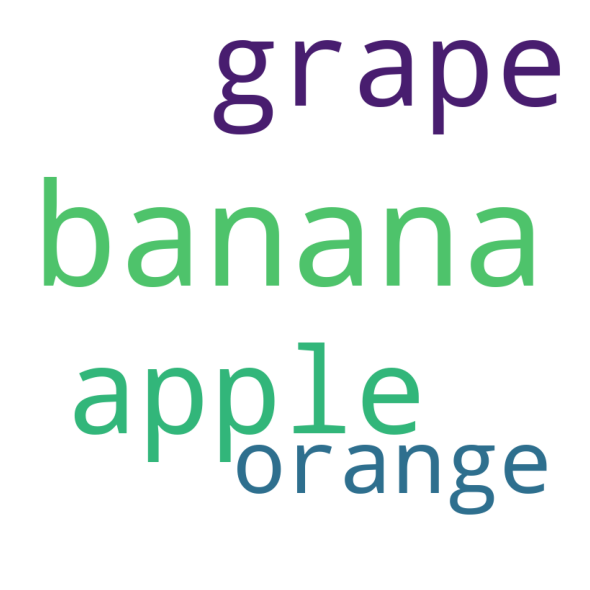

In [43]:
# Example usage
data = pd.Series(['apple', 'banana', 'apple', 'orange', 'grape', 'banana', 'banana', 'grape'])
generate_word_bubble(data)


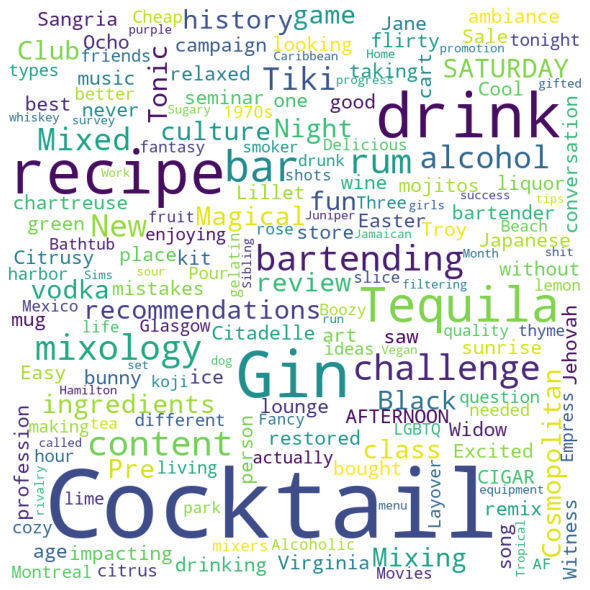

In [47]:
generate_word_bubble(df[df.category == 'Cocktail recipes and tutorials']['summary'])

C:\Users\stvnc\AppData\Local\Temp\ipykernel_60324\227108705.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  generate_word_bubble(df['Named Entities'].str.replace('[','').str.replace(']','').str.replace('None','').str.replace("'",''))


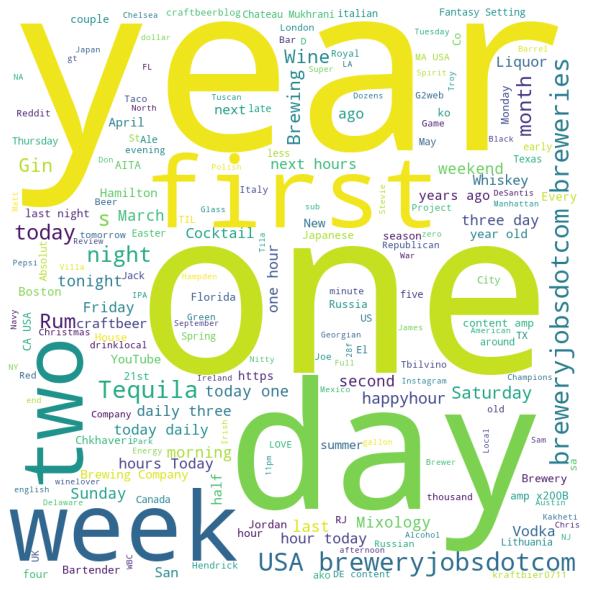

In [52]:
generate_word_bubble(df['Named Entities'].str.replace('[','').str.replace(']','').str.replace('None','').str.replace("'",''))

In [52]:
cols = ['subreddit','selftext','title','ups','category','sentiment','summary','topics']
category = '"Wine and beer recommendations"'
category = 'Personal stories and experiences'
category = '"Reviews of bars and restaurants"'
category = 'Wine and beer recommendations'
results_df[results_df['category']==category].sort_values(by='ups',ascending = False)[cols].to_clipboard()

In [20]:
results_df[results_df.2question_0 == 'Category: Reviews of gaming consoles and accessories'].title.iloc[0]

'Is there any way to fix my series X’s case? Rubbing alcohol went on it and took off some of the paint making it look oily'

In [ ]:
results_df.to_csv('./data/enriched_alcohol_reddit_v2.csv')

In [ ]:
categories = ['Cocktail recipes and tutorials','Wine and beer recommendations','Party and event photos','Alcohol-related memes and humor',
              'Reviews of bars and restaurants','Alcohol-related news and trends','Personal stories and experiences','Celebrity endorsements and sponsorships',
              'Health and wellness tips','Advocacy and activism']
